In [1]:
import numpy as np
import numpy.random as r

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set(font_scale=1.4)

from online_dmd.online import OnlineDMD, WeightedOnlineDMD
from online_dmd.windowed import WindowedDMD, WeightedWindowedDMD

In [2]:
o_dmd = OnlineDMD()
w_o_dmd = WeightedOnlineDMD()
w_dmd = WindowedDMD()
w_w_dmd = WeightedWindowedDMD()

In [3]:
omega = lambda t: 1 + 0.1*t
x_0 = np.array([1, 0])
X = [x_0]
t_diff = 0.1
for i in np.linspace(0, 10, num=100):
    A_t = np.matrix([[0, -omega(i)],[omega(i), 0]])
    x_t = np.matmul(X[-1], A_t)*t_diff + X[-1]
    X.append(x_t)
X = np.vstack(X)

true_eigen_values = np.matrix([[omega(i), -omega(i)]for i in np.linspace(0, 10, num=100)])

In [4]:
w = 10
o_dmd.initial_fit(X[:w, :], X[1:w+1, :])
w_o_dmd.initial_fit(X[:w, :], X[1:w+1, :])
w_dmd.initial_fit(X[:w, :], X[1:w+1, :])
w_w_dmd.initial_fit(X[:w, :], X[1:w+1, :])

In [5]:
o_recorded_eigs = []
w_o_recorded_eigs = []
w_recorded_eigs = []
w_w_recorded_eigs = []


for i in range(w+1, X.shape[0]-1):
    o_recorded_eigs.append(np.imag(np.log(np.linalg.eig(o_dmd.A_k)[0]))/t_diff)
    w_o_recorded_eigs.append(np.imag(np.log(np.linalg.eig(w_o_dmd.A_k)[0]))/t_diff)
    w_recorded_eigs.append(np.imag(np.log(np.linalg.eig(w_dmd.A_k)[0]))/t_diff)
    w_w_recorded_eigs.append(np.imag(np.log(np.linalg.eig(w_w_dmd.A_k)[0]))/t_diff)
    o_dmd.update(X[i, :], X[i+1, :])
    w_o_dmd.update(X[i, :], X[i+1, :])
    w_dmd.update(X[i, :], X[i+1, :])
    w_w_dmd.update(X[i, :], X[i+1, :])

o_recorded_eigs.append(np.imag(np.log(np.linalg.eig(o_dmd.A_k)[0]))/t_diff)
w_o_recorded_eigs.append(np.imag(np.log(np.linalg.eig(w_o_dmd.A_k)[0]))/t_diff)
w_recorded_eigs.append(np.imag(np.log(np.linalg.eig(w_dmd.A_k)[0]))/t_diff)
w_w_recorded_eigs.append(np.imag(np.log(np.linalg.eig(w_w_dmd.A_k)[0]))/t_diff)

In [6]:
o_recorded_eigs = np.vstack(o_recorded_eigs)
w_o_recorded_eigs = np.vstack(w_o_recorded_eigs)
w_recorded_eigs = np.vstack(w_recorded_eigs)
w_w_recorded_eigs = np.vstack(w_w_recorded_eigs)

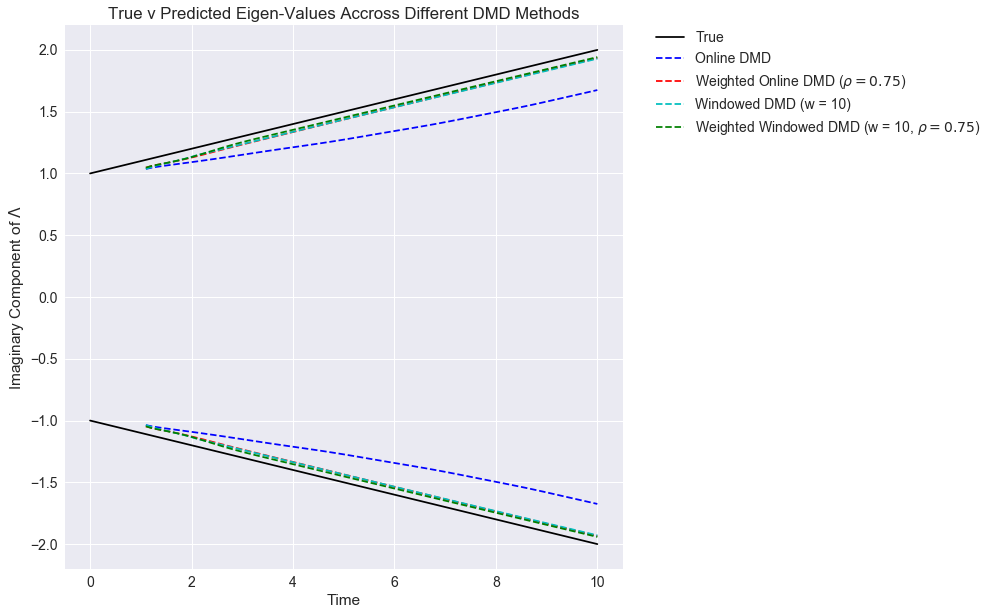

In [7]:
my_fig = plt.figure(figsize=(10, 10))
plt.plot(np.linspace(0, 10, num=100), true_eigen_values[:, 0], 'k', label='True' )
plt.plot(np.linspace(0, 10, num=100), true_eigen_values[:, 1], 'k')
plt.plot(np.linspace((w+1)*t_diff, 10, num=100-w), o_recorded_eigs[:, 0], '--b', label='Online DMD')
plt.plot(np.linspace((w+1)*t_diff, 10, num=100-w), o_recorded_eigs[:, 1], '--b')
plt.plot(np.linspace((w+1)*t_diff, 10, num=100-w), w_o_recorded_eigs[:, 0], '--r', label=r'Weighted Online DMD ($\rho=0.75$)')
plt.plot(np.linspace((w+1)*t_diff, 10, num=100-w), w_o_recorded_eigs[:, 1], '--r')
plt.plot(np.linspace((w+1)*t_diff, 10, num=100-w), w_recorded_eigs[:, 0], '--c', label='Windowed DMD (w = 10)')
plt.plot(np.linspace((w+1)*t_diff, 10, num=100-w), w_recorded_eigs[:, 1], '--c')
plt.plot(np.linspace((w+1)*t_diff, 10, num=100-w), w_w_recorded_eigs[:, 0], '--g', label=r'Weighted Windowed DMD (w = 10, $\rho=0.75$)')
plt.plot(np.linspace((w+1)*t_diff, 10, num=100-w), w_w_recorded_eigs[:, 1], '--g')
plt.ylabel(r'Imaginary Component of $\Lambda$')
plt.xlabel('Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('True v Predicted Eigen-Values Accross Different DMD Methods')
plt.show()